In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras import layers, models
import sklearn as sk
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow.keras.applications.resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
!unzip /horse-or-human.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
import zipfile
zipref=zipfile.ZipFile(r'horse-or-human.zip')
zipref.extractall('./horse-or-human')
zipref.close()

In [32]:
import os
os.path

<module 'ntpath' from 'c:\\Users\\gg\\anaconda3\\envs\\deep\\lib\\ntpath.py'>

In [33]:
import os
# Directory with our training horse pictures
train_horse_dir=os.path.join('./horse-or-human/horses')
# Directory with our training human pictures
train_humans_dir=os.path.join('./horse-or-human/humans')

In [34]:
train_humans_dir

'./horse-or-human/humans'

In [35]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_humans_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [36]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_humans_dir)))

total training horse images: 500
total training human images: 527


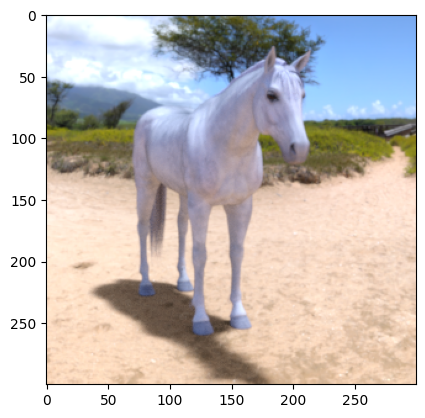

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
first=os.path.join(train_horse_dir, train_horse_names[9])
img = mpimg.imread(first)
plt.imshow(img)

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [39]:
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [40]:
l=["a","b","c"]
for i,j in enumerate(l):
  print(i,j)

0 a
1 b
2 c


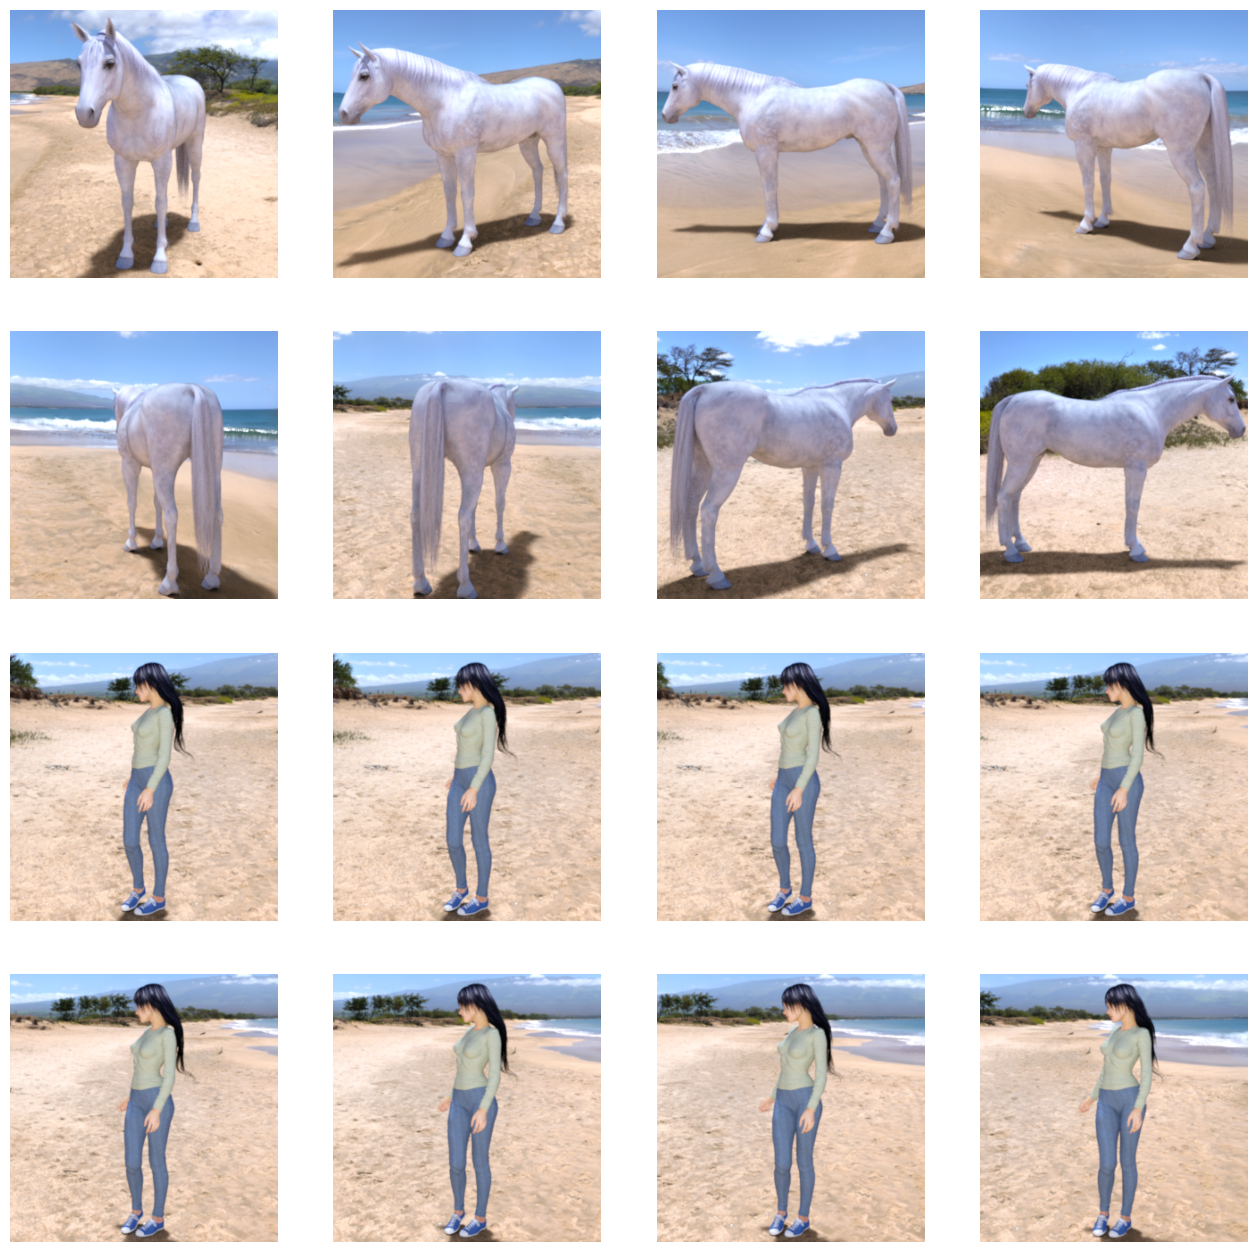

In [41]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_humans_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [42]:
import tensorflow as tf

In [43]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(60, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(40, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\gg\anaconda3\envs\deep\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 60)   │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 60)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 40)   │        21,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 30)     │        10,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7680)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,932,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,975,465 (15.17 MB)

 Trainable params: 3,975,465 (15.17 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
#from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
train_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',rescale=1/255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary',
    subset="training"
)

Found 822 images belonging to 2 classes.


In [49]:
test_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary',
    subset="validation"
)

Found 205 images belonging to 2 classes.


In [54]:
x_train,y_train=next(train_generator)

In [55]:
y_train.shape

(128,)

In [ ]:
#x_test,y_test=next(test_generator)

In [56]:
history = model.fit(
      train_generator,
      epochs=20,
      batch_size=30,
      verbose=1,validation_data=test_generator)

c:\Users\gg\anaconda3\envs\deep\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 96s 13s/step - accuracy: 0.5265 - loss: 0.7908 - val_accuracy: 0.5122 - val_loss: 0.6977
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.5576 - loss: 0.6827 - val_accuracy: 0.5317 - val_loss: 0.6788
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 0.6529 - loss: 0.6309 - val_accuracy: 0.6927 - val_loss: 0.5778
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.7249 - loss: 0.5622 - val_accuracy: 0.6829 - val_loss: 0.5875
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 0.7826 - loss: 0.5019 - val_accuracy: 0.6293 - val_loss: 0.6728
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.7555 - loss: 0.5183 - val_accuracy: 0.6293 - val_loss: 0.5946
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.8025 - loss: 0.4468 - val_accuracy: 0.6634 - val_loss: 0.5808
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.8393 - loss: 0.3803 - val_accuracy: 0.7268 - val_loss: 0.5242
Epoch 9

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img)
  x /= 255
  print(f"shape of image:{x.shape}")
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

NameError: name 'files' is not defined

In [60]:
#transfer learning model
from keras.applications import EfficientNetB4

In [61]:
base_model=EfficientNetB4(
    include_top=False,
    weights="imagenet",
    pooling="avg",
    input_shape=(300,300,3)
)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [62]:
for layer in base_model.layers[:-2]:
  layer.trainable=False

In [63]:
from keras import regularizers

In [64]:
model=keras.Sequential([base_model,
                        keras.layers.Dense(100,activation="relu",kernel_regularizer=keras.regularizers.L1(0.02)),
                        keras.layers.Dense(50,activation="relu",kernel_regularizer=keras.regularizers.L1(0.02)),
                        keras.layers.Dense(1,activation="sigmoid")
                        ])

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 1792)           │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       179,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,858,224 (68.12 MB)

 Trainable params: 184,401 (720.32 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

In [66]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [67]:
history = model.fit(
      train_generator,
      epochs=20,
      verbose=1,validation_data=test_generator)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 147s 19s/step - accuracy: 0.4744 - loss: 105.8435 - val_accuracy: 0.4878 - val_loss: 87.7372
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 125s 18s/step - accuracy: 0.4782 - loss: 82.7719 - val_accuracy: 0.5122 - val_loss: 67.2442
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 124s 18s/step - accuracy: 0.5059 - loss: 63.0656 - val_accuracy: 0.5122 - val_loss: 49.8956
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 125s 18s/step - accuracy: 0.5185 - loss: 46.4186 - val_accuracy: 0.5122 - val_loss: 35.5869
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 124s 18s/step - accuracy: 0.5015 - loss: 32.7095 - val_accuracy: 0.5122 - val_loss: 24.2926
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 124s 18s/step - accuracy: 0.5101 - loss: 22.2142 - val_accuracy: 0.5122 - val_loss: 16.0407
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 124s 18s/step - accuracy: 0.5142 - loss: 14.6473 - val_accuracy: 0.5122 - val_loss: 10.8062
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 124s 18s/step - accuracy: 0.4923 - loss: 10.1157 - val_accuracy: 0.

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img)
  x /= 255
  print(f"shape of image:{x.shape}")
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

Saving horse-561221_640.jpg to horse-561221_640 (1).jpg
horse-561221_640 (1).jpg
shape of image:(300, 300, 3)
1/1 [==============================] - 0s 157ms/step
[[-0.09604555  0.09024832 -0.11438389 ... -0.17374106 -0.19344954
  -0.13107847]]
[-0.09604555  0.09024832 -0.11438389 ... -0.17374106 -0.19344954
 -0.13107847]


In [ ]:
classes.shape

(1, 1792)

In [ ]:
import numpy as np
np.argmax(classes[0])

1187

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

def build_model(hp):
    base_model = EfficientNetB4(
        include_top=False,
        weights="imagenet",
        input_shape=(224, 224, 3),
        pooling="avg",
    )

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([base_model])

    model.add(Dense(hp.Int(f"dense_units_1", 128, 512, 64), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(hp.Float(f"dropout_1", 0.2, 0.5, 0.1)))

    model.add(Dense(hp.Int(f"dense_units_2", 64, 256, 32), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(hp.Float(f"dropout_2", 0.2, 0.5, 0.1)))

    model.add(Dense(hp.Int(f"dense_units_3", 32, 128, 16), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(hp.Float(f"dropout_3", 0.2, 0.5, 0.1)))

    model.add(Dense(1, activation="sigmoid"))

    opt = Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling="log"))

    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [ ]:
tuner=kt.RandomSearch(build_model,
                      objective="val_accuracy",
                      max_trials=5,
                      directory="tuning",
                      project_name="version1")

71686520/71686520 [==============================] - 0s 0us/step


In [ ]:
tuner.search(train_generator,epochs=5,validation_data=test_generator)

Trial 5 Complete [00h 03m 29s]
val_accuracy: 0.5121951103210449

Best val_accuracy So Far: 0.5121951103210449
Total elapsed time: 00h 17m 28s


In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 1792)              17673823  
 )                                                               
                                                                 
 dense (Dense)               (None, 512)               918016    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 112)               28784     
                                                        

In [ ]:
model.layers.weights

[<tf.Variable 'dense_2/kernel:0' shape=(256, 112) dtype=float32, numpy=
 array([[ 0.01506241,  0.0216203 , -0.10783859, ..., -0.09300178,
         -0.02536462, -0.06461875],
        [ 0.10357965, -0.12470482, -0.06312867, ..., -0.03829058,
         -0.08479248,  0.07983901],
        [-0.0549641 ,  0.03457386,  0.06887087, ...,  0.00421941,
          0.00999147,  0.04620368],
        ...,
        [ 0.05756057,  0.05593073, -0.108324  , ...,  0.05303119,
          0.00412098, -0.03340778],
        [ 0.0337628 ,  0.1124946 ,  0.03787283, ..., -0.00285641,
         -0.03660459, -0.05530477],
        [ 0.03767568,  0.00770835, -0.02601051, ..., -0.02906633,
         -0.07710034, -0.01487143]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(112,) dtype=float32, numpy=
 array([-1.81442522e-03, -1.07969381e-02, -4.82903607e-03, -1.47842094e-02,
        -2.17575096e-02,  1.43534737e-02,  8.21364485e-03,  2.05972092e-03,
        -2.86612716e-02, -1.10238511e-02, -6.36579003e-03, -8.35328